In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import jupyter_black
import warnings

warnings.filterwarnings("ignore")

jupyter_black.load()
pd.set_option("display.max_columns", None)

# Exploratory data analysis using top 30 features

In [256]:
X = pd.read_csv("../data/X_all_features.csv")
y = pd.read_csv("../data/labels.csv")
y.columns = ["heart_disease"]
feature_importance = pd.read_csv("../data/forest_importances.csv")

In [258]:
X_with_label = X.copy()
X_with_label["heart_disease"] = y
X_with_label.shape

(77266, 110)

In [159]:
feature_importance[-30:].sort_values(by="Importance", ascending=False).head()

,Feature,Importance
108,GENHLTH,0.037870
107,_RFHLTH,0.035030
106,EMPLOY1,0.029604
105,_AGE80,0.026665
104,BPHIGH4,0.023615


In [160]:
# select top 30 features
feature_importance = (
    feature_importance[-30:].sort_values(by="Importance", ascending=False).copy()
)

In [161]:
X = X[feature_importance["Feature"].to_list()]
X.shape

(77266, 30)

In [162]:
# continuous variables, pre-feature selection
continuous = [
    "GRENDAY_",
    "MENTHLTH",
    "ORNGDAY_",
    "HTIN4",
    "WTKG3",
    "FC60_",
    "CHILDREN",
    "MAXVO2_",
    "PHYSHLTH",
    "_VEGESUM",
    "_DRNKWEK",
    "STRFREQ_",
    "VEGEDA1_",
    "VEGETAB1",
    "STRENGTH",
    "_BMI5",
    "DROCDY3_",
    "BEANDAY_",
    "ALCDAY5",
    "FRUIT1",
]

continuous = [col for col in X.columns if col in continuous]

categorical = [col for col in X.columns if col not in continuous]

In [163]:
X.shape

(77266, 30)

##  Feature distributions
Note that these features have not been scaled yet

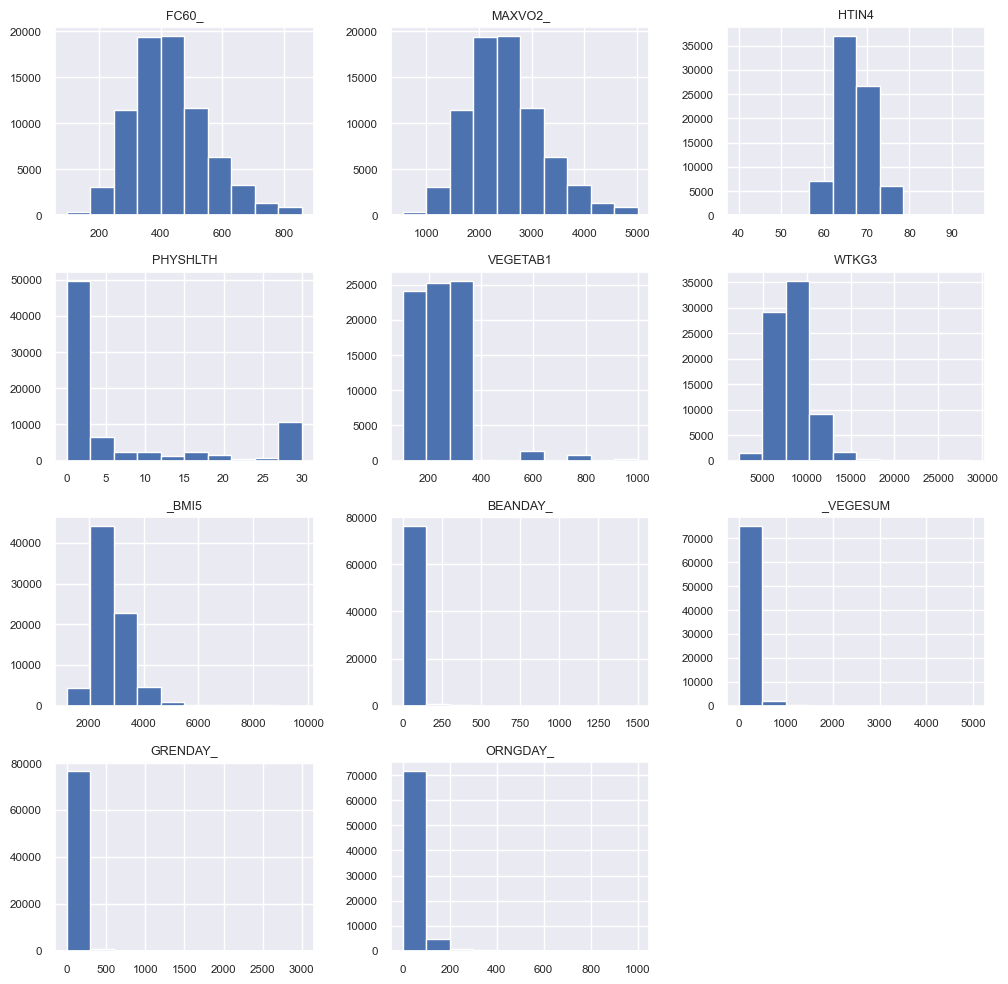

In [164]:
ax1 = X[continuous].hist(figsize=(12, 12))
plt.show()

Some variables are highly left-skewed. Log-transform to better visualize variablity: 

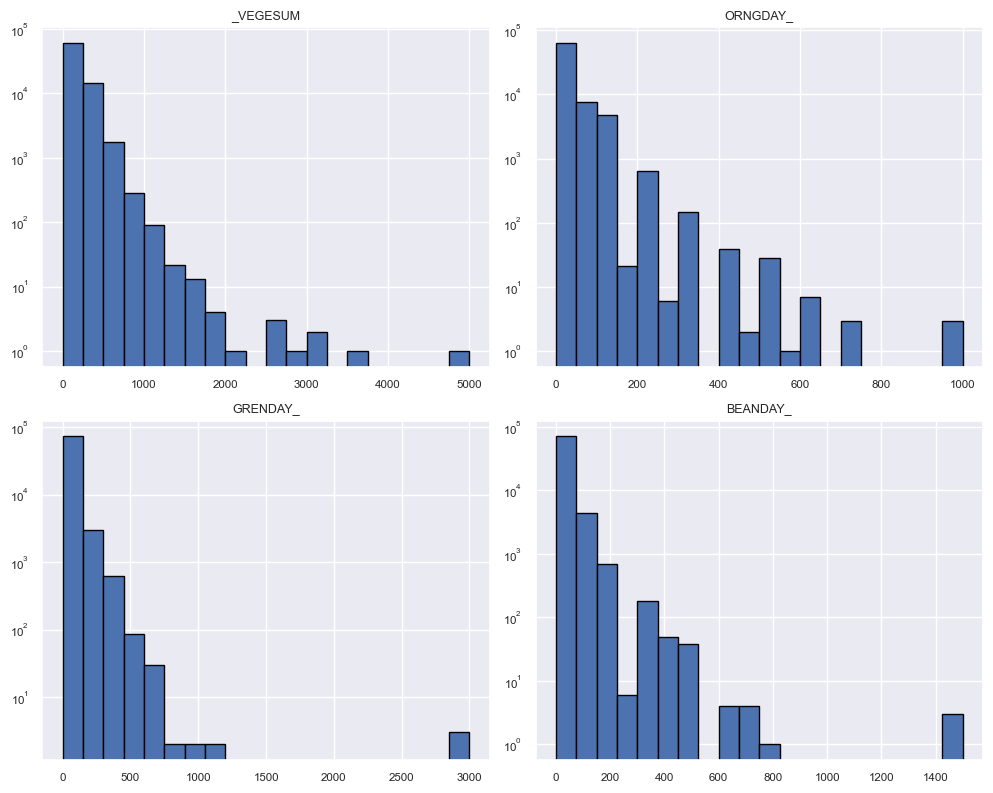

In [167]:
left_skewed_var = [
    "_VEGESUM",
    "ORNGDAY_",
    "GRENDAY_",
    "BEANDAY_",
]

# Create a grid of histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the 2D array of subplots to access each individual subplot
axes = axes.flatten()

# Loop through each column and plot histogram with log-transformed axes
for i, column in enumerate(X[left_skewed_var].columns):
    axes[i].hist(X[column], bins=20, edgecolor="black", log=True)
    axes[i].set_yscale("log", base=10)
    axes[i].set_title(f"{column}")

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [168]:
X[X["GRENDAY_"] > 1500]

,GENHLTH,_RFHLTH,EMPLOY1,_AGE80,BPHIGH4,_RFCHOL,_RFHYPE5,_AGE65YR,FC60_,MAXVO2_,DIFFWALK,TOLDHI2,_AGE_G,SEX,PNEUVAC3,CVDSTRK3,QLACTLM2,_MISVEGN,CHCCOPD1,HTIN4,DIABETE3,PHYSHLTH,VEGETAB1,WTKG3,_BMI5,_FRTRESP,BEANDAY_,_VEGESUM,GRENDAY_,ORNGDAY_
16594,3.0,1.0,7.0,80.0,1.0,1.0,1.0,2.0,246.0,1435.0,0.0,1.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0,3.0,30.0,315.0,8845.0,2720.0,1.0,3.0,3060.0,3000.0,7.0
50299,4.0,2.0,8.0,26.0,3.0,0.0,0.0,1.0,783.0,4570.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,67.0,3.0,0.0,110.0,6577.0,2271.0,1.0,0.0,5000.0,3000.0,1000.0
52379,3.0,1.0,1.0,63.0,3.0,0.0,0.0,1.0,423.0,2469.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,3.0,0.0,203.0,5897.0,2098.0,1.0,57.0,3140.0,3000.0,40.0


In [169]:
X[X["BEANDAY_"] > 1000]

,GENHLTH,_RFHLTH,EMPLOY1,_AGE80,BPHIGH4,_RFCHOL,_RFHYPE5,_AGE65YR,FC60_,MAXVO2_,DIFFWALK,TOLDHI2,_AGE_G,SEX,PNEUVAC3,CVDSTRK3,QLACTLM2,_MISVEGN,CHCCOPD1,HTIN4,DIABETE3,PHYSHLTH,VEGETAB1,WTKG3,_BMI5,_FRTRESP,BEANDAY_,_VEGESUM,GRENDAY_,ORNGDAY_
2794,5.0,2.0,8.0,76.0,1.0,0.0,1.0,2.0,341.0,1988.0,1.0,2.0,6.0,0.0,1.0,1.0,1.0,0.0,1.0,60.0,1.0,26.0,110.0,7257.0,3125.0,1.0,1500.0,3529.0,29.0,1000.0
32549,5.0,2.0,8.0,59.0,1.0,0.0,1.0,1.0,449.0,2617.0,1.0,2.0,5.0,0.0,1.0,0.0,1.0,0.0,1.0,66.0,3.0,30.0,101.0,8029.0,2746.0,1.0,1500.0,1710.0,100.0,10.0
47588,2.0,1.0,1.0,35.0,3.0,0.0,0.0,1.0,699.0,4075.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,67.0,3.0,0.0,210.0,7257.0,2506.0,1.0,1500.0,1667.0,17.0,7.0


May want to consider dropping inviduals who have outlying values in these features.

# Feature-feature correlations and associations

## Analyze correlations between continuous features

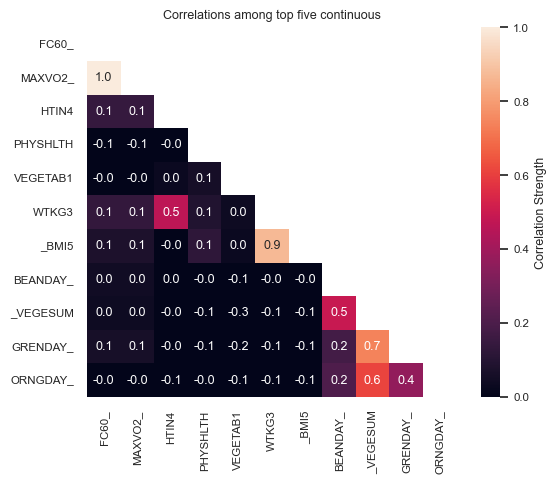

In [228]:
sns.set(font_scale=0.75)
corr = X[continuous].corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax1 = sns.heatmap(
        corr,
        vmax=1,
        vmin=0,
        square=True,
        cbar_kws={"label": "Correlation Strength"},
        annot=True,
        fmt=".1f",
        mask=mask,
    )
plt.show()

Plot the same, but with only top continuous features

In [211]:
top_5_cont_list = feature_importance[feature_importance["Feature"].isin(continuous)][
    :5
]["Feature"].tolist()

In [213]:
top_5_cont_list

['FC60_', 'MAXVO2_', 'HTIN4', 'PHYSHLTH', 'VEGETAB1']

In [225]:
top_5_cont = X[top_5_cont_list].copy()
top_5_cont.columns = [
    "max_oxygen",
    "functional_capacity",
    "height",
    "num_days_bad_health",
    "other_vegetable_count",
]
top_5_cont

,max_oxygen,functional_capacity,height,num_days_bad_health,other_vegetable_count
0,277.0,1618.0,64.0,0.0,306.0
1,258.0,1507.0,67.0,0.0,203.0
2,423.0,2469.0,68.0,30.0,101.0
3,252.0,1470.0,65.0,14.0,203.0
4,265.0,1545.0,67.0,0.0,101.0
...,...,...,...,...,...
77261,717.0,4185.0,69.0,2.0,102.0
77262,680.0,3965.0,69.0,0.0,312.0
77263,455.0,2654.0,65.0,0.0,102.0
77264,569.0,3320.0,64.0,0.0,205.0


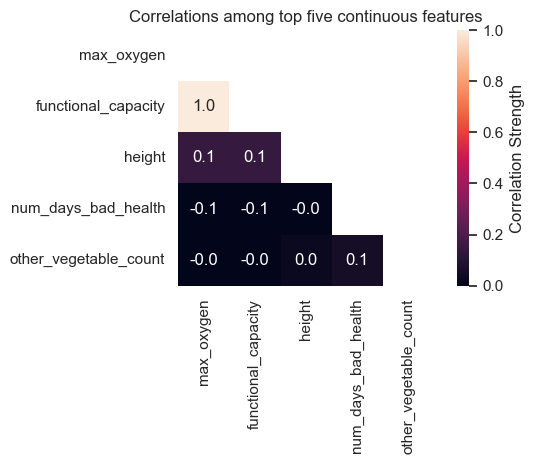

In [233]:
sns.set(font_scale=1)
corr = top_5_cont.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax1 = sns.heatmap(
        corr,
        vmax=1,
        vmin=0,
        square=True,
        cbar_kws={"label": "Correlation Strength"},
        annot=True,
        fmt=".1f",
        mask=mask,
    )
    ax1.set_title("Correlations among top five continuous features")
plt.tight_layout()
plt.savefig("../figures/top_5_continuous_correlation")
plt.show()

If any pair of features has a correlation coefficient greater than 0.5, we can try excluding the features with the lower ranked importance (as determined by ExtraTrees)

In [171]:
high_corr_pairs = [
    (col1, col2)
    for col1 in corr.columns
    for col2 in corr.columns
    if col1 != col2 and abs(corr.loc[col1, col2]) > 0.5
]

In [172]:
high_corr_pairs

[('FC60_', 'MAXVO2_'),
 ('MAXVO2_', 'FC60_'),
 ('WTKG3', '_BMI5'),
 ('_BMI5', 'WTKG3'),
 ('_VEGESUM', 'GRENDAY_'),
 ('_VEGESUM', 'ORNGDAY_'),
 ('GRENDAY_', '_VEGESUM'),
 ('ORNGDAY_', '_VEGESUM')]

In [189]:
feature_importance[
    feature_importance["Feature"].isin(
        ["FC60_", "MAXVO2_", "WTKG3", "_BMI5", "_VEGESUM", "GRENDAY_", "ORNGDAY_"]
    )
]

,Feature,Importance
100,FC60_,0.022241
99,MAXVO2_,0.021580
85,WTKG3,0.012051
84,_BMI5,0.011967
81,_VEGESUM,0.011663
80,GRENDAY_,0.011660
79,ORNGDAY_,0.011558


MAXVO2_ (Estimated Age-Gender Specific Maximum Oxygen Consumption) and FC60_ (Estimated Functional Capacity, which is a measure of the ratio of the rate of energy expended during an activity to the rate of energy expended at rest) are highly correlated, as are WTKG3 (Reported weight in kilograms) and _BMI5 (Body Mass Index). BMI5 was calculated from WTKG3/(HTM4*HTM4), so it is logical that these two are correlated. 

We may wish to drop MAXVO2_, \_BMI5, which are lower-ranked in terms of feature importance than FC60_ and WTKG3 respectively. Likewise, we can drop GRENDAY_ and ORGNDAY_ as both are correlated with _VEGESUM. 

## Categorical variable association using Cramer's V

In [174]:
categorical

['GENHLTH',
 '_RFHLTH',
 'EMPLOY1',
 '_AGE80',
 'BPHIGH4',
 '_RFCHOL',
 '_RFHYPE5',
 '_AGE65YR',
 'DIFFWALK',
 'TOLDHI2',
 '_AGE_G',
 'SEX',
 'PNEUVAC3',
 'CVDSTRK3',
 'QLACTLM2',
 '_MISVEGN',
 'CHCCOPD1',
 'DIABETE3',
 '_FRTRESP']

In [175]:
from itertools import combinations

# Generate all possible pairs
all_pairs = list(combinations(categorical, 2))

# Print the result
len(all_pairs)

171

In [176]:
# https://www.kaggle.com/code/chrisbss1/cramer-s-v-correlation-matrix
from scipy.stats import chi2_contingency
import numpy as np


def cramers_V(var1, var2):
    crosstab = np.array(
        pd.crosstab(var1, var2, rownames=None, colnames=None)
    )  # Cross table building
    stat = chi2_contingency(crosstab)[
        0
    ]  # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab)  # Number of observations
    mini = (
        min(crosstab.shape) - 1
    )  # Take the minimum value between the columns and the rows of the cross table
    return np.sqrt(stat / (obs * mini))


rows = []

for var1 in categorical:
    col = []
    for var2 in categorical:
        cramers = cramers_V(X[var1], X[var2])  # Cramer's V test
        col.append(round(cramers, 2))  # Keeping of the rounded value of the Cramer's V
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns=categorical, index=categorical)

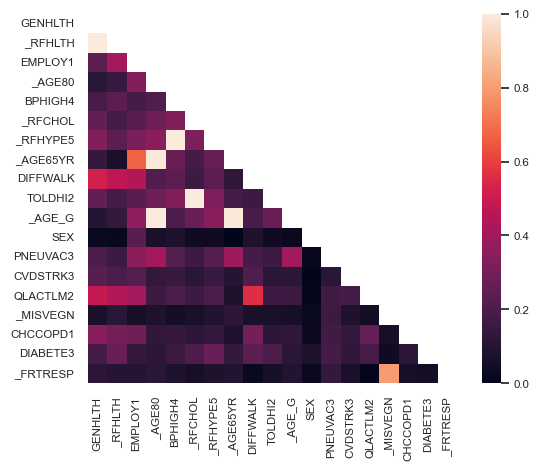

In [177]:
mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True


with sns.axes_style("white"):
    ax = sns.heatmap(df, mask=mask, vmin=0.0, vmax=1, square=True)

plt.show()

Some feature pairs are highly associated, like _RFCHOL (Adults who have had their cholesterol checked and have been told by a doctor, nurse, or other health professional
that it was high) and TOLDHI2 (Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high?). As with highly correlated numeric features, we may wish to exclude the lower-ranked feature in associated features pairs. 

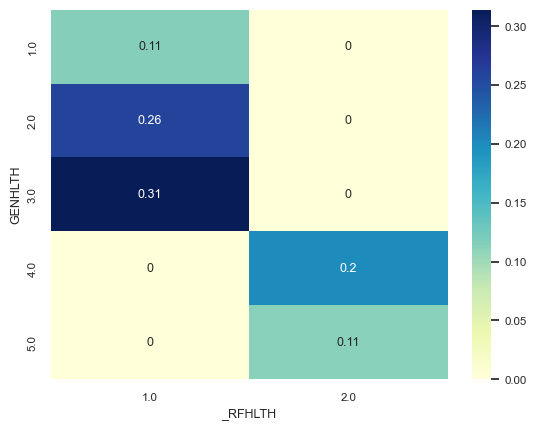

In [178]:
contingency_table = pd.crosstab(X["GENHLTH"], X["_RFHLTH"], normalize=True)
chi2, p, _, _ = chi2_contingency(contingency_table)
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.show()

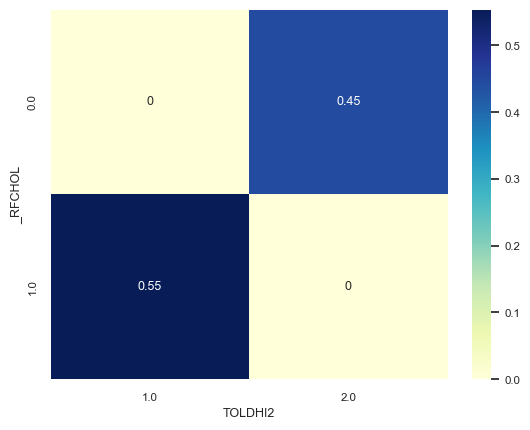

In [179]:
contingency_table = pd.crosstab(X["_RFCHOL"], X["TOLDHI2"], normalize=True)
chi2, p, _, _ = chi2_contingency(contingency_table)
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.show()

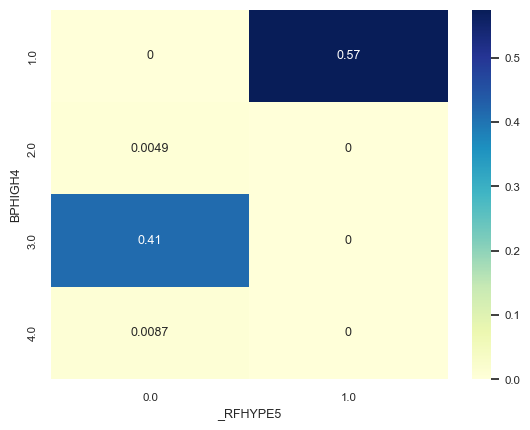

In [180]:
contingency_table = pd.crosstab(X["BPHIGH4"], X["_RFHYPE5"], normalize=True)
chi2, p, _, _ = chi2_contingency(contingency_table)
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.show()

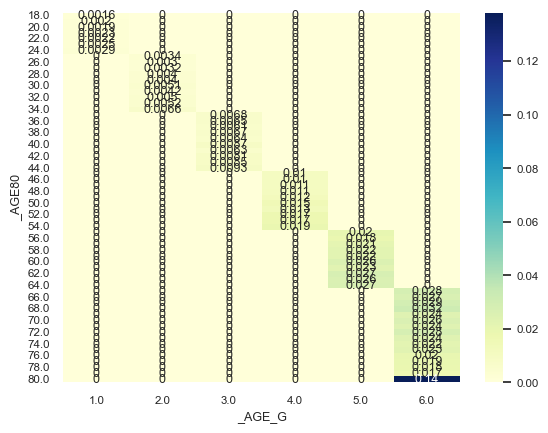

In [182]:
contingency_table = pd.crosstab(X["_AGE80"], X["_AGE_G"], normalize=True)
chi2, p, _, _ = chi2_contingency(contingency_table)
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.show()

In [183]:
high_assoc_pairs = [
    (col1, col2)
    for col1 in df.columns
    for col2 in df.columns
    if col1 != col2 and abs(df.loc[col1, col2]) > 0.5
]
high_assoc_pairs

[('GENHLTH', '_RFHLTH'),
 ('GENHLTH', 'DIFFWALK'),
 ('_RFHLTH', 'GENHLTH'),
 ('EMPLOY1', '_AGE65YR'),
 ('_AGE80', '_AGE65YR'),
 ('_AGE80', '_AGE_G'),
 ('BPHIGH4', '_RFHYPE5'),
 ('_RFCHOL', 'TOLDHI2'),
 ('_RFHYPE5', 'BPHIGH4'),
 ('_AGE65YR', 'EMPLOY1'),
 ('_AGE65YR', '_AGE80'),
 ('_AGE65YR', '_AGE_G'),
 ('DIFFWALK', 'GENHLTH'),
 ('DIFFWALK', 'QLACTLM2'),
 ('TOLDHI2', '_RFCHOL'),
 ('_AGE_G', '_AGE80'),
 ('_AGE_G', '_AGE65YR'),
 ('QLACTLM2', 'DIFFWALK'),
 ('_MISVEGN', '_FRTRESP'),
 ('_FRTRESP', '_MISVEGN')]

In [184]:
cols = list(set(value for tuple in high_assoc_pairs for value in tuple))

In [187]:
feature_importance[feature_importance["Feature"].isin(cols)]

,Feature,Importance
108,GENHLTH,0.037870
107,_RFHLTH,0.035030
106,EMPLOY1,0.029604
105,_AGE80,0.026665
104,BPHIGH4,0.023615
103,_RFCHOL,0.022743
102,_RFHYPE5,0.022546
101,_AGE65YR,0.022270
98,DIFFWALK,0.017621
97,TOLDHI2,0.017043


# Plot feature-target associations

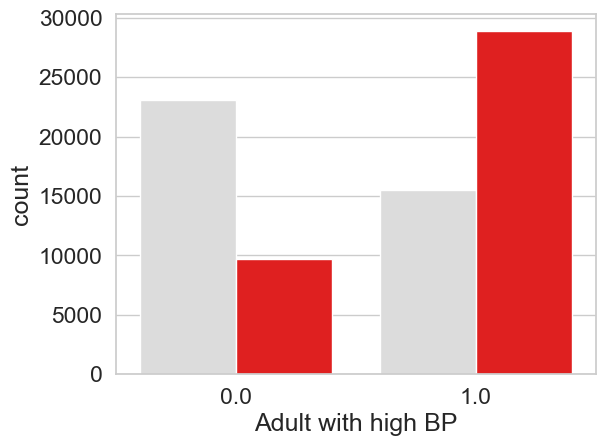

In [313]:
sns.set(font_scale=1.5)
# 82c7a5
# combined_palette = ["#82c7a5", "#0f45ac"]
combined_palette = ["#DCDCDC", "#ff0000"]
sns.set_style("whitegrid")
sns.countplot(
    x="_RFHYPE5",
    hue="heart_disease",
    data=X_with_label,
    palette=combined_palette,
    legend=False,
)
plt.xlabel("Adult with high BP")
plt.tight_layout()
plt.savefig("../figures/BP.png")

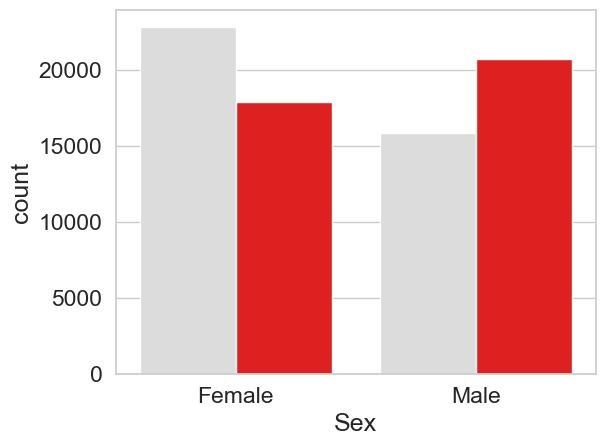

In [305]:
X_with_label["SEX"] = X_with_label["SEX"].replace({0: "Female", 1: "Male"})
sns.countplot(
    x="SEX",
    hue="heart_disease",
    data=X_with_label,
    palette=combined_palette,
    legend=False,
)
plt.xlabel("Sex")
plt.tight_layout()
plt.savefig("../figures/sex.png")

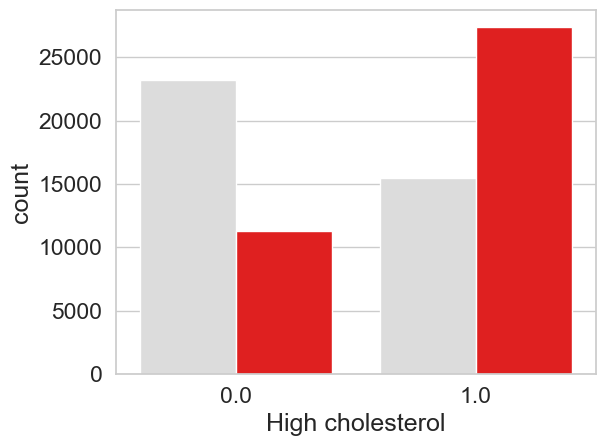

In [312]:
sns.countplot(
    x="_RFCHOL",
    hue="heart_disease",
    data=X_with_label,
    palette=combined_palette,
    legend=False,
)
plt.xlabel("high_cholesterol")
plt.tight_layout()
plt.xlabel("High cholesterol")
plt.savefig("../figures/chol.png")

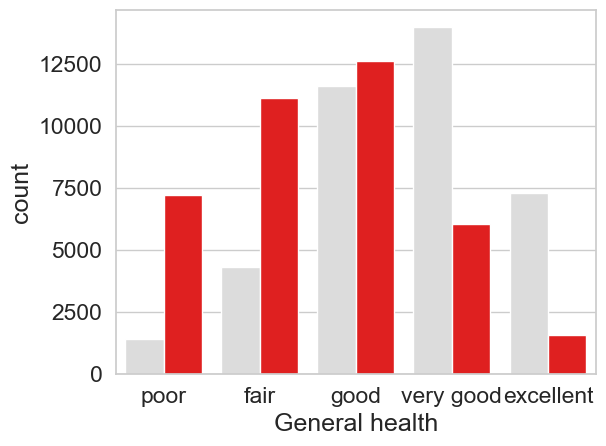

In [307]:
X_with_label["GENHLTH"] = X_with_label["GENHLTH"].replace(
    {1: "excellent", 2: "very good", 3: "good", 4: "fair", 5: "poor"}
)
plt.xlabel("General health")
sns.countplot(
    x="GENHLTH",
    hue="heart_disease",
    data=X_with_label,
    order=["poor", "fair", "good", "very good", "excellent"],
    palette=combined_palette,
    legend=False,
)
plt.tight_layout()
plt.savefig("../figures/genhlth.png")

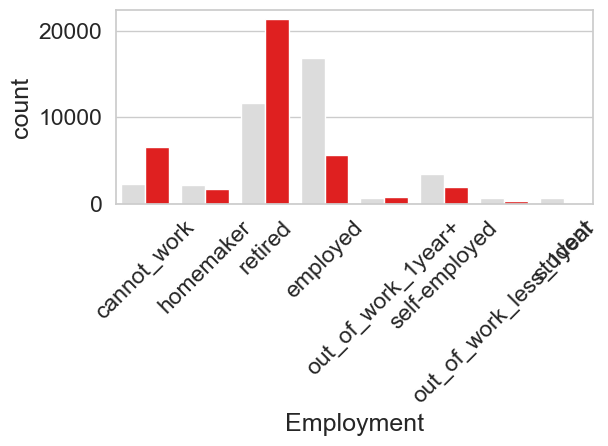

In [308]:
X_with_label["EMPLOY1"] = X_with_label["EMPLOY1"].replace(
    {
        1: "employed",
        2: "self-employed",
        3: "out_of_work_1year+",
        4: "out_of_work_less_1year",
        5: "homemaker",
        6: "student",
        7: "retired",
        8: "cannot_work",
    }
)
plt.xticks(rotation=45)
plt.xlabel("Employment")
sns.countplot(
    x="EMPLOY1",
    hue="heart_disease",
    data=X_with_label,
    palette=combined_palette,
    legend=False,
)
plt.tight_layout()
plt.savefig("../figures/employment.png")

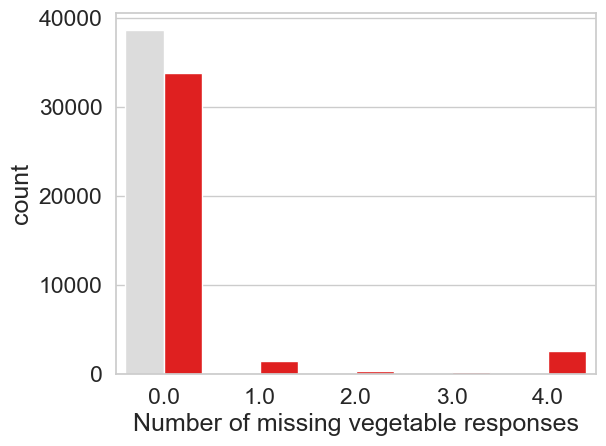

In [318]:
sns.countplot(
    x="_MISVEGN",
    hue="heart_disease",
    data=X_with_label,
    palette=combined_palette,
    legend=False,
)
plt.xlabel("Number of missing vegetable responses")
plt.tight_layout()
plt.savefig("../figures/veg.png")

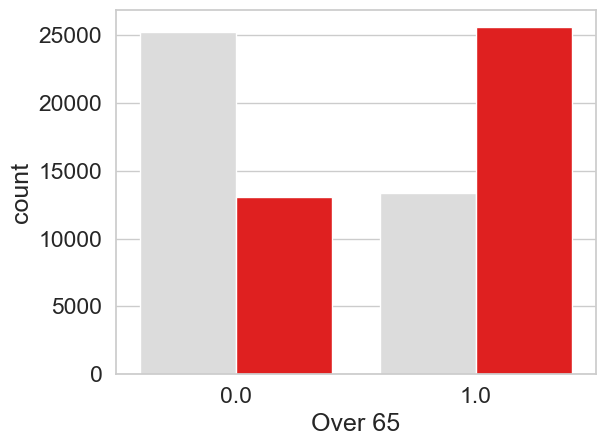

In [311]:
X_with_label_65 = X_with_label.copy()
X_with_label_65["_AGE65YR"] = X_with_label["_AGE65YR"].replace({1: 0, 2: 1})
sns.countplot(
    x="_AGE65YR",
    hue="heart_disease",
    data=X_with_label_65,
    palette=combined_palette,
    legend=False,
)
plt.xlabel("Over 65")
plt.tight_layout()
plt.savefig("../figures/over_65.png")

We may want to consider how our final  models perform with and without associated categorical variables. 